## 原文链接：https://blog.csdn.net/A_D_I_D_A_S/article/details/87785693

## Sklearn库中的决策树有两种：分类决策树、回归决策树。下面我们通过具体的案例学习如何使用这两种决策树。

### 一、分类决策树

分类决策树（DecisionTreeClassifier）就是通过对训练集的训练，然后对测试集中的数据做出正确的分类。

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [43]:
iris = datasets.load_iris()

In [45]:
x_all = iris.data
y_all = iris.target

x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.3, random_state=1)

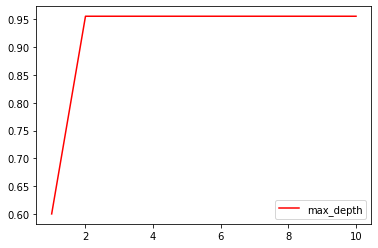

In [50]:
# 首先最优的剪枝参数
import matplotlib.pyplot as plt
test =[]
for i in range(10):
    clf =DecisionTreeClassifier(max_depth=i+1,criterion="entropy")
    clf = clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()


In [51]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [53]:
y_predict = clf.predict(x_test)
precision=(y_test == y_predict).sum()/y_test.size
print('DecisionTreeClassifier准确率为%s' % precision)

DecisionTreeClassifier准确率为0.9555555555555556


### 计算训练后的模型的准确率的方法有

####  1、model.score(x_test, y_test)方法

In [54]:
score = clf.score(x_test, y_test)        #
score

0.9555555555555556

#### 2、交叉验证 cross_val_score

In [55]:
from sklearn.model_selection import cross_val_score,cross_validate
import numpy as np

In [56]:
clf = DecisionTreeClassifier(criterion='entropy')
print ('交叉验证分别得分：',cross_val_score(clf, x_all, y_all, cv=3))
print('交叉验证综合得分：%s' % np.mean(cross_val_score(clf, x_all, y_all, cv=3)))

交叉验证分别得分： [0.98039216 0.92156863 1.        ]
交叉验证综合得分：0.960375816993464


#### 3、gridSearchCV  用于自动化调参。参考：https://blog.csdn.net/weixin_41988628/article/details/83098130

### 二、回归决策树

回归决策树（DecisionTreeRegressor）是通过对数据的拟合，然后预测测试数据的值。
下面我们通过对boston数据使用决策树模型，预测新数据测值。

In [57]:
from sklearn.tree import DecisionTreeRegressor

boston = datasets.load_boston()

In [60]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [61]:
x_all, y_all = boston.data, boston.target

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.3)

In [65]:
DT_clf_Regressor = DecisionTreeRegressor()
DT_clf_Regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [66]:
DT_clf_Regressor.score(x_test,y_test)

0.7802326116361762

In [68]:
y_predict = DT_clf_Regressor.predict(x_test)

In [69]:
y_predict

array([16.6, 29.9, 16.7, 32.9, 14.6, 23.6, 21.5, 50. , 10.9, 24.6, 20.9,
       22. , 22.6, 50. , 17.7, 32.4, 13.1, 22. , 23.6, 36.5, 18. , 11.3,
       36.2, 27.1, 23.4, 36.2, 24. , 16. , 30.8, 17.8, 26.2, 21.1, 14.9,
       12.7, 19.6, 21.4, 31.5, 18.5, 20.3, 20.4, 37. ,  7.5, 12.5, 21.7,
       23.6,  8.5,  7. , 18.3, 22.5, 15. , 50. , 22. , 20.2, 22.2, 20.1,
       24.3, 30.1,  7.5, 20.4, 19.6, 15. , 16.6, 19.4, 15.2, 21.7, 21. ,
       21.8, 17.8, 33.8, 12.5,  5. , 25.1,  8.5, 23.4,  9.5, 20.6, 19. ,
       20.4, 21.2, 50. , 20.8, 19.4,  5. , 24.4, 24.2, 35.2, 20. , 33.8,
       10.5, 28.7,  9.6, 20.1, 17.8, 32. , 18.4,  7. , 46.7, 20.2, 15.6,
       16.6, 26.4, 23.4, 50. , 27.9, 19.6, 33.4, 44.8, 23.8, 20.2, 21.7,
       32.5, 10.2, 21.9, 19. , 17.3, 10.9, 19.4, 11.7, 24.4, 11.3, 24.6,
        9.7, 41.3, 23.9, 20.8, 50. , 15.2, 31.5, 28. , 20.4, 23.9, 10.2,
       50. , 21.7, 12.5, 50. , 28.7, 21.1,  9.5, 21.1, 29.1, 25.2, 20.1,
       18.6, 11.8, 23.4, 16.1, 12.5, 29.6, 20. ,  7

In [70]:
y_test

array([15.2, 26.7, 14.1, 34.9, 15.6, 26.6, 19.6, 27.9,  8.3, 23.2, 17.4,
       22.4, 16.2, 50. , 20. , 26.6, 10.5, 24.8, 26.4, 36. , 18.4, 11.5,
       29.6, 28.6, 22.8, 22. , 24.3, 17.1, 33.1, 19.5, 25. , 19.7, 13.4,
       14.8, 16.1, 22.5, 34.7, 19.8, 22.4, 19.9, 29. , 17.2, 13.8, 27.1,
       23. , 11. , 13.8, 20.4, 22.6, 14.5, 50. , 22. , 20.8, 23.3, 10.9,
       23.3, 30.7,  7.2, 24.3, 18.7, 16.5, 19.4, 17. , 21.4, 18.9, 24.7,
       24.5, 10.4, 33.2, 15.1, 16.3, 22. ,  8.4, 24.1, 13.3, 20.5, 19.5,
       20.6, 19.2, 44. , 20. , 18.9,  8.8, 28.1, 23.1, 42.8, 17.1, 33.2,
       10.2, 22.2, 12.7, 16.8, 14. , 29.4, 19.6, 17.9, 43.8, 22.6, 13.8,
       21.7, 20.3, 22.1, 50. , 26.6, 21.4, 34.9, 38.7, 25. , 22.7, 24.5,
       28.4,  7.2, 19.9, 18.5, 15.7, 13.9, 17.5, 19.1, 24.8, 12.3, 23.7,
       12. , 50. , 24.1, 19.5, 48.5, 18.8, 28.4, 23.9, 21.8, 30.5, 17.2,
       50. , 20.3, 13.8, 39.8, 20.7, 20.1, 13.4, 20.6, 31.1, 25.3, 20.4,
       19.3, 13.4, 19.4, 16.7, 14.5, 33.1, 19.3, 13

In [71]:
y_test.size

152

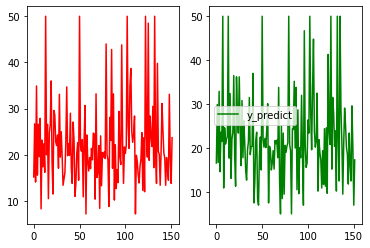

In [75]:
import matplotlib.pyplot as plt
plt.subplot2grid((1,2),(0,0))
plt.plot(range(0,y_test.size), y_test, color='red', label='y_test')
plt.subplot2grid((1,2),(0,1))
plt.plot(range(0,y_test.size), y_predict, color='green', label='y_predict')
plt.legend()
plt.show()

可以看出大体趋势一致，但是准确性还有待提高